
# 🎨 End-to-End Seaborn Data Visualization (Expert Notebook)

## Purpose of this Notebook
This notebook is a **complete mastery guide to Seaborn**, built on **real-world data analysis** principles.

### What makes this notebook special?
- ✅ Only **Seaborn + Matplotlib backend**
- ✅ Strictly aligned with the dataset
- ✅ Every visualization has **WHEN & WHY explanations**
- ✅ Industry-ready EDA & storytelling approach

> If Matplotlib gives control, **Seaborn gives intelligence & beauty**



## 📌 Why Seaborn?

Seaborn is built **on top of Matplotlib** and makes statistical visualization easy.

### Why Data Analysts love Seaborn:
- Automatic statistical aggregation
- Beautiful default themes
- Handles categorical data effortlessly
- Perfect for **EDA (Exploratory Data Analysis)**

👉 Use Seaborn when you want **patterns, relationships, distributions**


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)


## 🔹 Load Dataset (Single Source of Truth)

In [2]:

df = pd.read_csv("Realistic_E-Commerce_Dataset.csv")
df.head()


,user_id,session_id,date,gender,age,location,membership_status,returning_customer,device_type,browser,...,traffic_source,ad_campaign,coupon_used,discount_applied,product_category,wishlist_items,cart_items,avg_session_value,payment_method,purchase
0,1,4174,2023-01-01 00:00:00,Female,45,Australia,Registered,0,Mobile,Edge,...,Referral,Campaign_B,0,0,Sports,4,2,345.40,COD,1
1,2,4507,2023-01-01 01:00:00,Male,34,USA,Guest,0,Mobile,Edge,...,Social,Campaign_C,0,1,Books,9,1,286.72,Debit Card,1
2,3,1860,2023-01-01 02:00:00,Male,48,Canada,Guest,0,Mobile,Safari,...,Organic,Campaign_C,0,0,Electronics,6,2,190.42,UPI,1
3,4,2294,2023-01-01 03:00:00,Female,25,Germany,Registered,0,Desktop,Edge,...,Social,Campaign_B,0,1,Home,7,7,328.79,UPI,1
4,5,2130,2023-01-01 04:00:00,Female,57,UK,Registered,0,Desktop,Chrome,...,Social,Campaign_A,1,0,Clothing,7,1,85.97,NetBanking,1



## 🔹 Derived Metrics (Explicit & Traceable)


In [3]:

df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M").astype(str)

df["engagement_score"] = (
    df["pages_viewed"] +
    df["clicks"] +
    df["scroll_depth"] / 100
)

df["converted"] = df["purchase"].map({0: "No Purchase", 1: "Purchased"})


# 📊 Seaborn Visualizations (20+)

### 📊 Count Plot – Category Comparison
- Use when comparing counts across categories
- Automatically handles categorical aggregation
- Best for frequency analysis

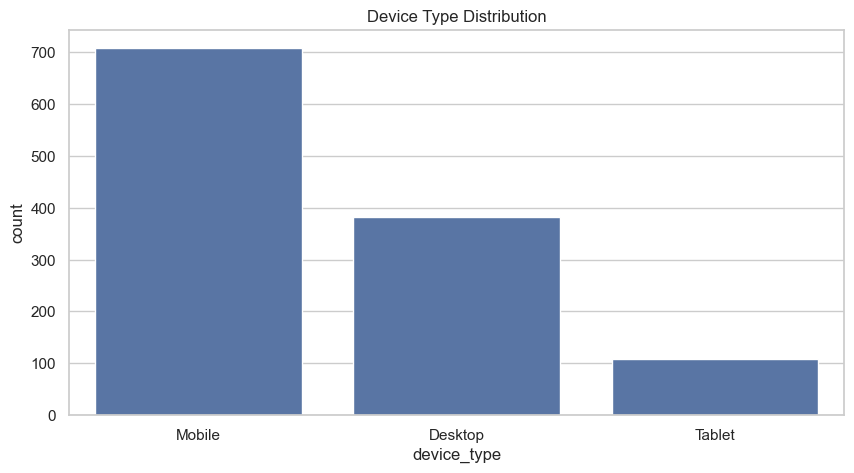

In [4]:

sns.countplot(data=df, x="device_type")
plt.title("Device Type Distribution")
plt.show()


### 📊 Count Plot with Hue – Category vs Outcome
- Use when comparing sub-groups within categories
- Adds another dimension using hue
- Great for conversion analysis

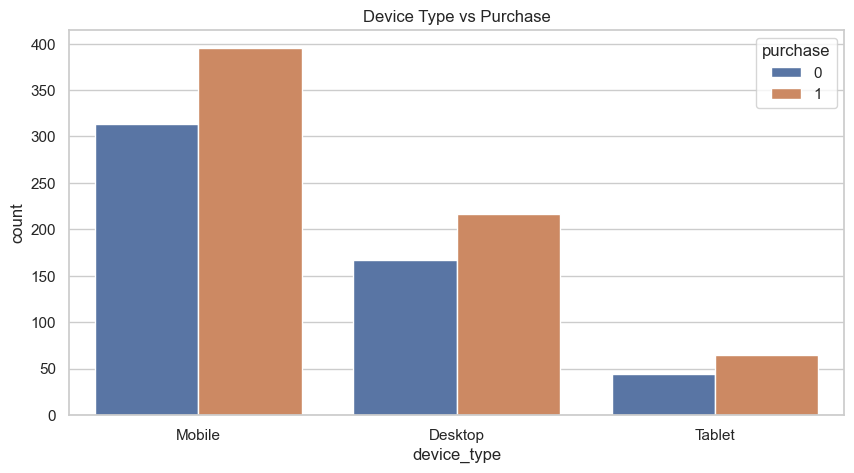

In [5]:

sns.countplot(data=df, x="device_type", hue="purchase")
plt.title("Device Type vs Purchase")
plt.show()


### 📊 Bar Plot – Aggregated Comparison
- Shows mean or estimator values
- Useful for performance comparison
- Confidence intervals included by default

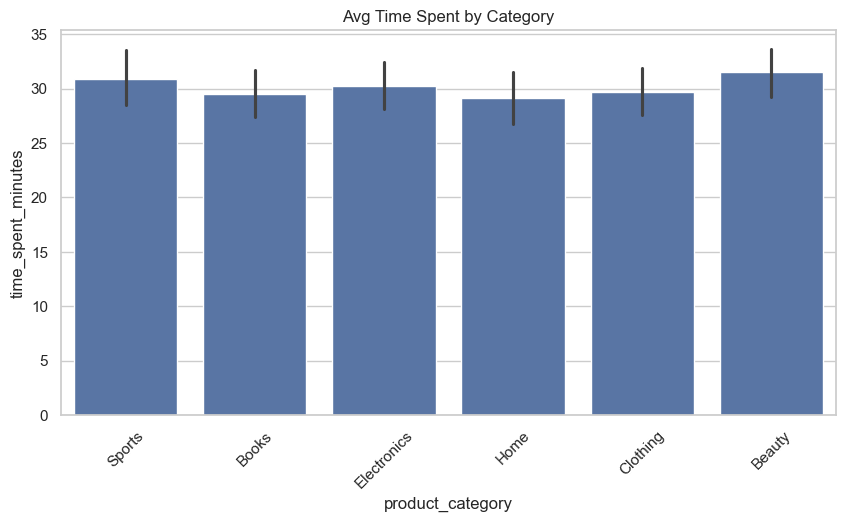

In [6]:

sns.barplot(data=df, x="product_category", y="time_spent_minutes")
plt.title("Avg Time Spent by Category")
plt.xticks(rotation=45)
plt.show()


### 📈 Line Plot – Trend Over Time
- Best for time series trends
- Shows confidence intervals
- Automatically aggregates data

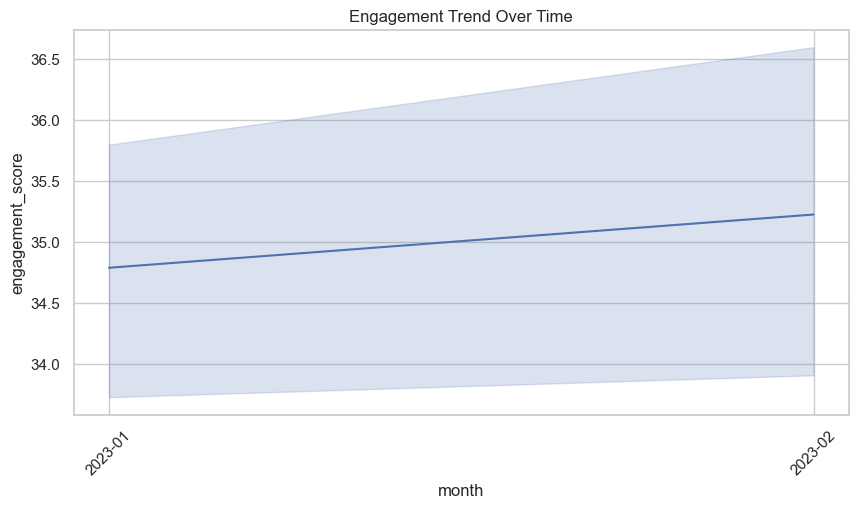

In [7]:

sns.lineplot(data=df, x="month", y="engagement_score")
plt.title("Engagement Trend Over Time")
plt.xticks(rotation=45)
plt.show()


### 📉 Histogram – Distribution Analysis
- Understand data spread
- Detect skewness
- Find concentration ranges

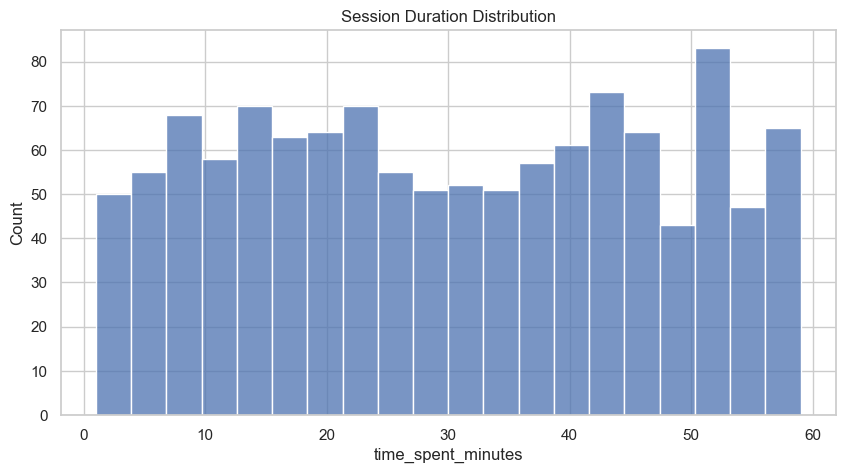

In [8]:

sns.histplot(df["time_spent_minutes"], bins=20)
plt.title("Session Duration Distribution")
plt.show()


### 📉 KDE Plot – Density Estimation
- Smoothed distribution view
- Better than histogram for patterns
- Useful for comparisons

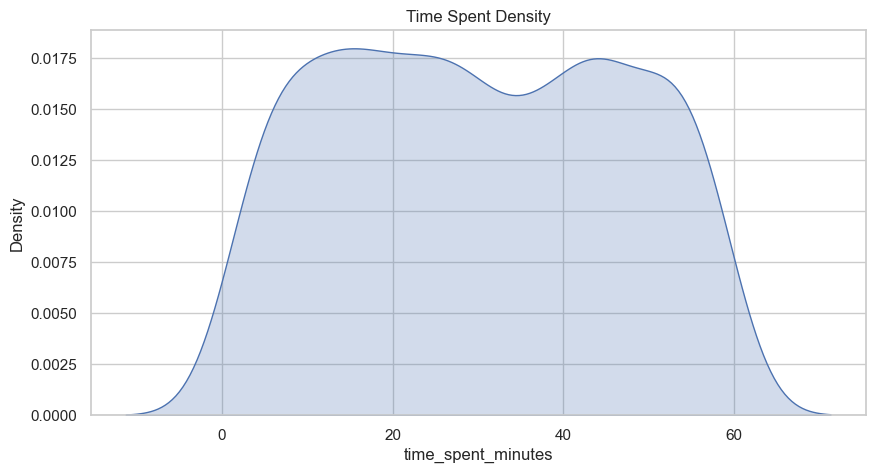

In [9]:

sns.kdeplot(df["time_spent_minutes"], fill=True)
plt.title("Time Spent Density")
plt.show()


### 📦 Box Plot – Distribution Comparison
- Identify outliers
- Compare medians
- Understand spread

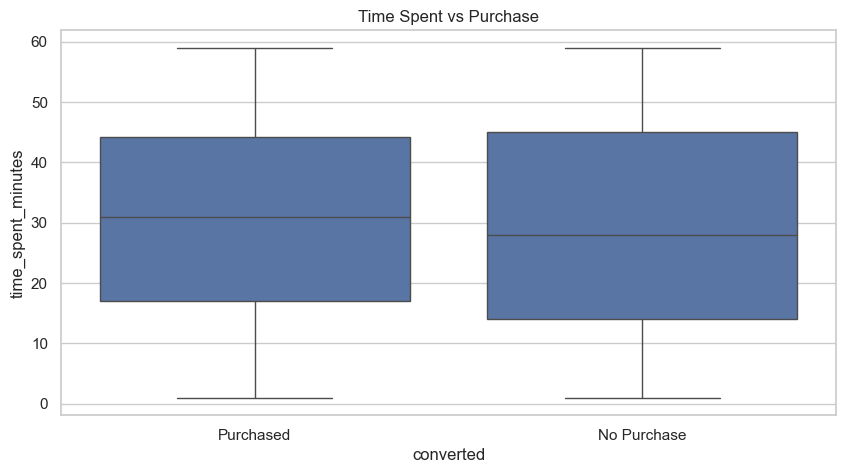

In [10]:

sns.boxplot(data=df, x="converted", y="time_spent_minutes")
plt.title("Time Spent vs Purchase")
plt.show()


### 🎻 Violin Plot – Distribution + Density
- Combines box + KDE
- Shows distribution shape
- Great for comparison

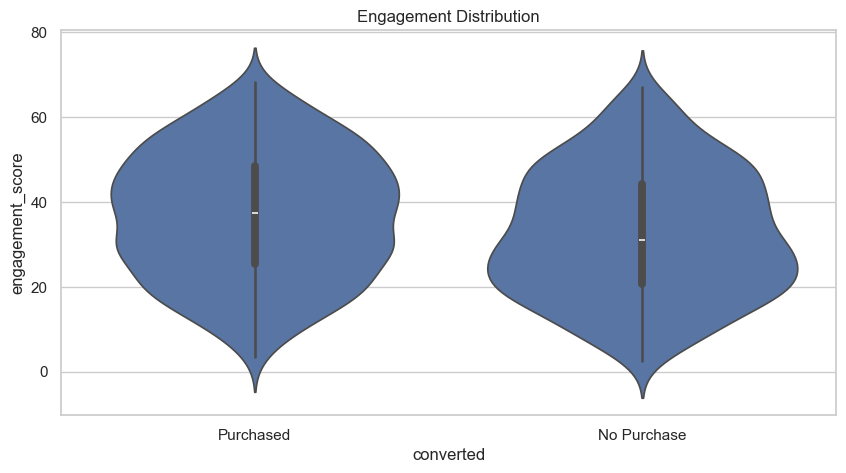

In [11]:

sns.violinplot(data=df, x="converted", y="engagement_score")
plt.title("Engagement Distribution")
plt.show()


### 🔵 Scatter Plot – Relationship Analysis
- Study correlation
- Identify clusters
- Detect anomalies

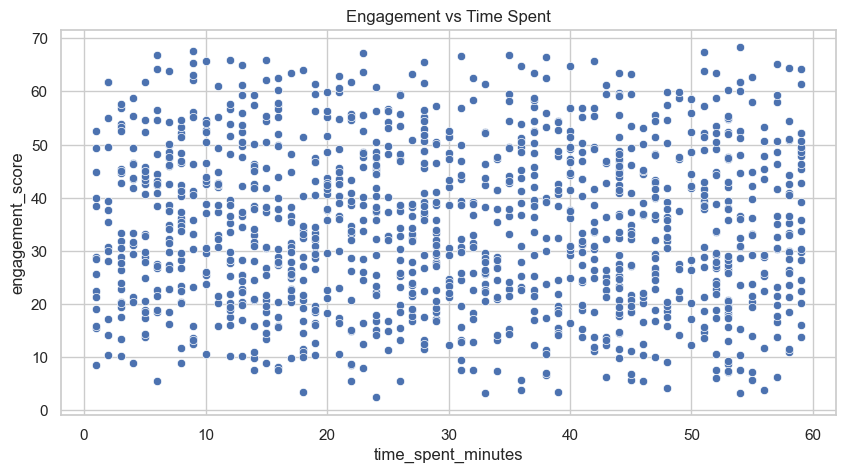

In [12]:

sns.scatterplot(data=df, x="time_spent_minutes", y="engagement_score")
plt.title("Engagement vs Time Spent")
plt.show()


### 🔵 Scatter with Hue – Multi-dimensional Analysis
- Adds categorical separation
- Identifies behavioral differences
- Improves insight depth

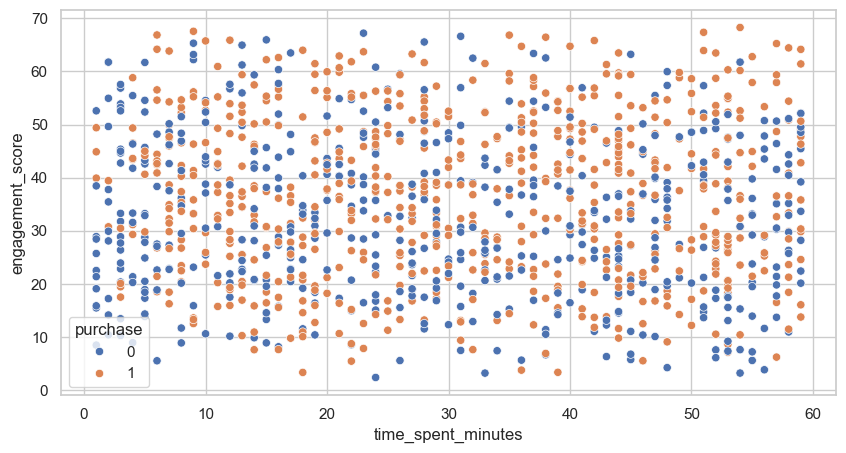

In [13]:

sns.scatterplot(
    data=df,
    x="time_spent_minutes",
    y="engagement_score",
    hue="purchase"
)
plt.show()


### 🔥 Heatmap – Correlation Analysis
- Shows relationships between numeric variables
- Quick pattern recognition
- Important for feature selection

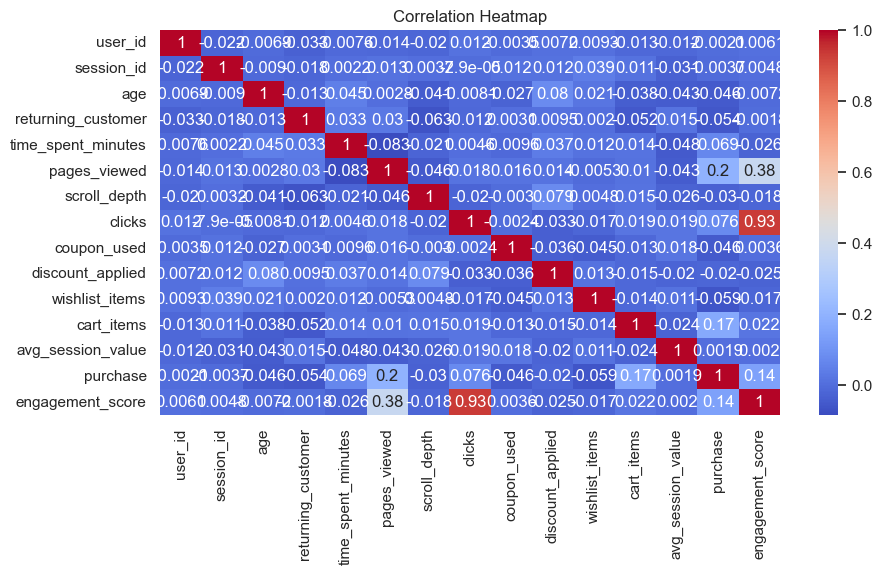

In [14]:

corr = df.select_dtypes("number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### 🔗 Pair Plot – Multivariate Relationships
- Explores multiple relationships
- Used early in EDA
- Helps feature understanding

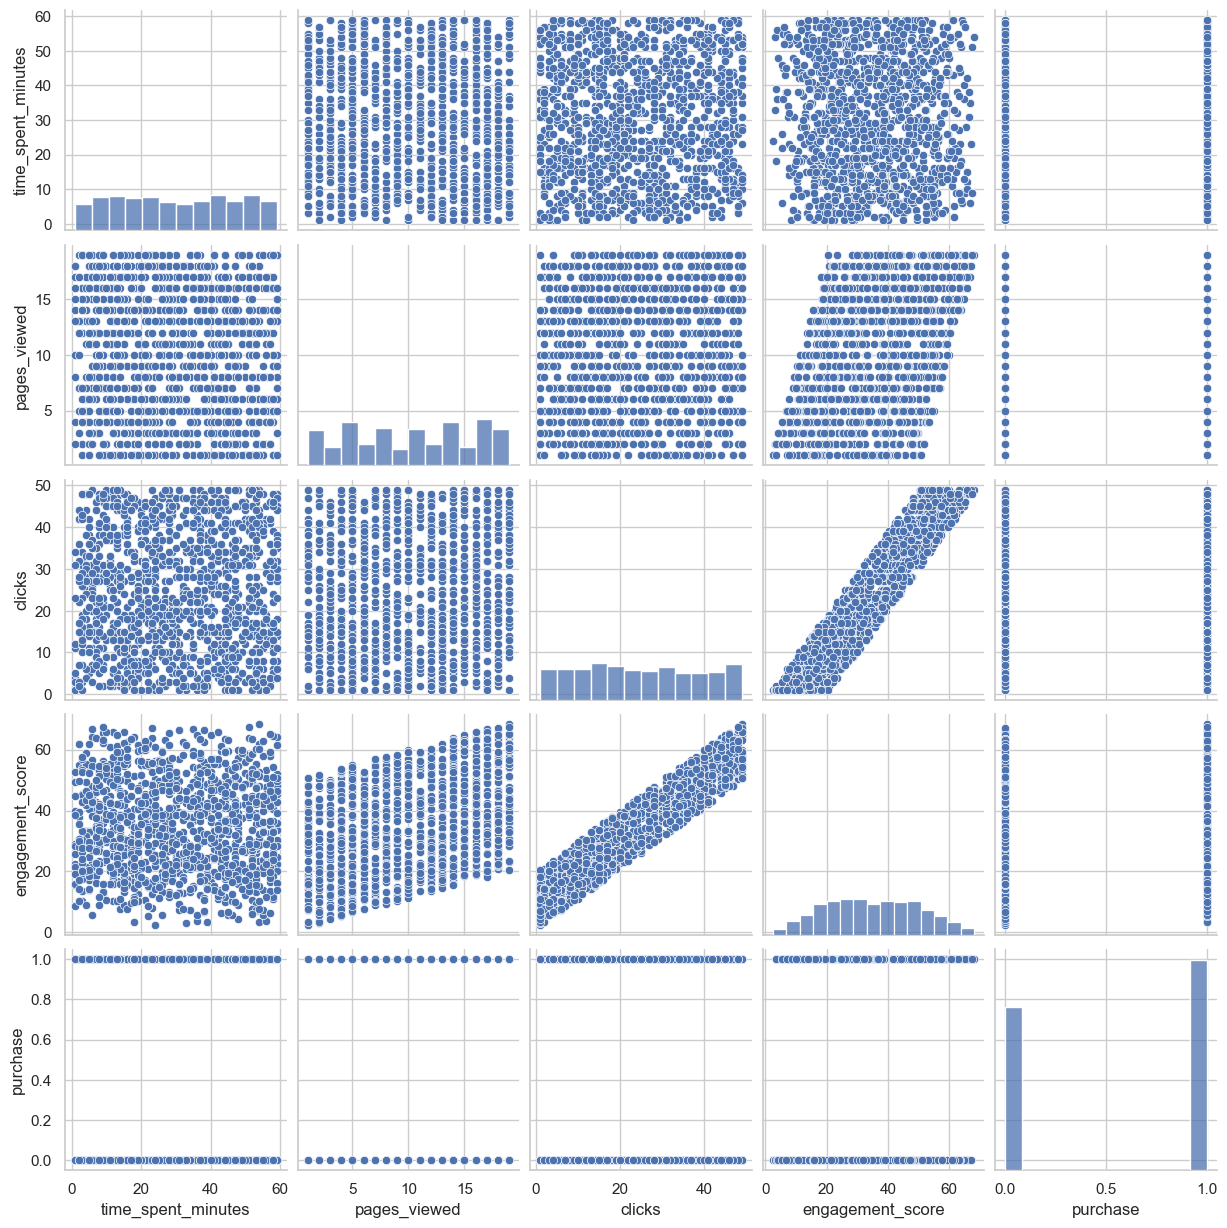

In [15]:

sns.pairplot(df[["time_spent_minutes","pages_viewed","clicks",
                 "engagement_score","purchase"]])
plt.show()


### 📍 Strip Plot – Raw Data Points
- Shows individual observations
- Avoids over-aggregation
- Good for small datasets

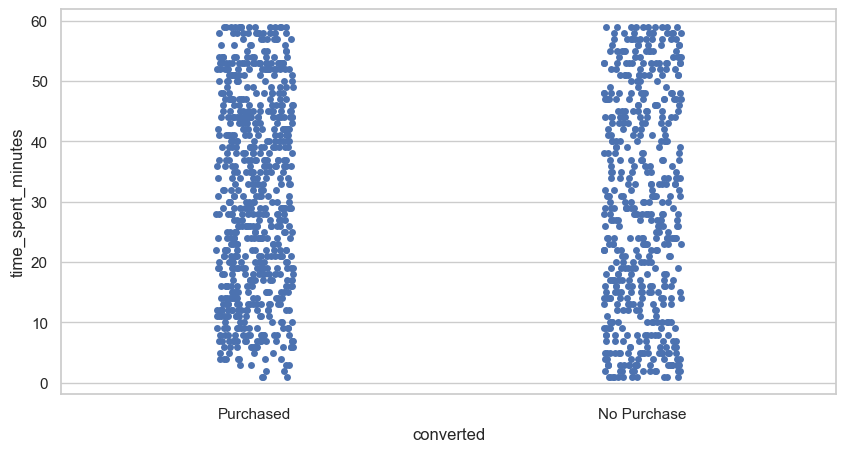

In [16]:

sns.stripplot(data=df, x="converted", y="time_spent_minutes", jitter=True)
plt.show()


### 🐝 Swarm Plot – Non-overlapping Points
- Better than strip for dense data
- Shows true distribution
- More readable

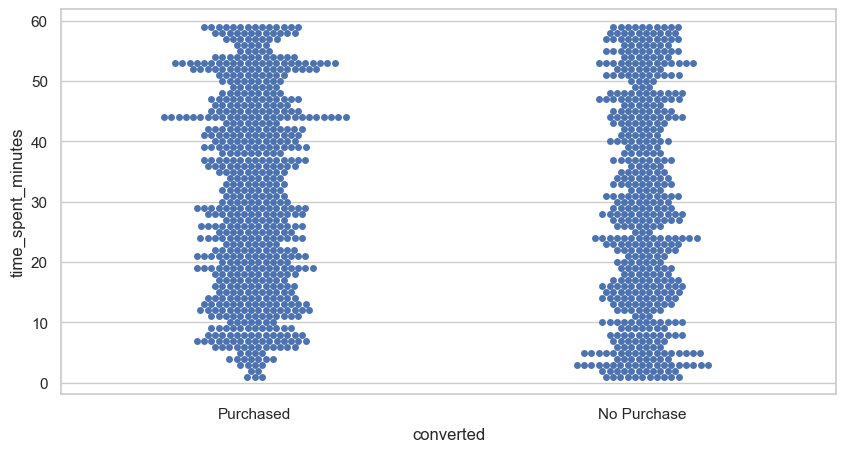

In [17]:

sns.swarmplot(data=df, x="converted", y="time_spent_minutes")
plt.show()


### 📦 Boxen Plot – Large Data Distribution
- Better for large datasets
- More quantiles
- Deep distribution insight

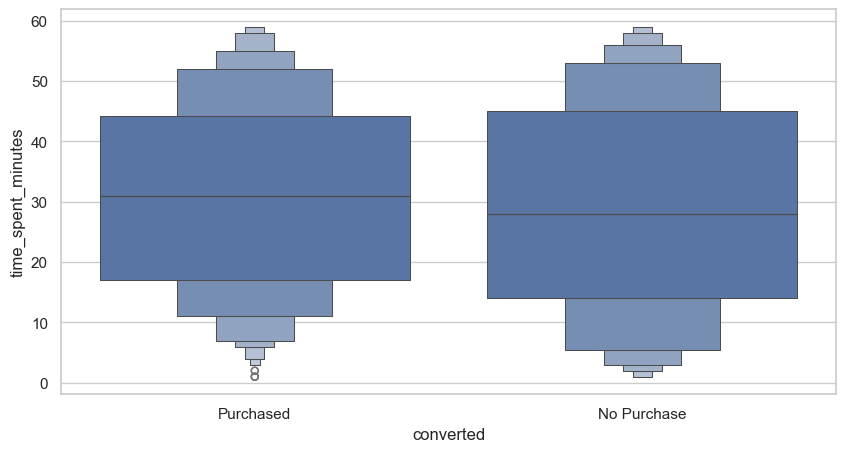

In [18]:

sns.boxenplot(data=df, x="converted", y="time_spent_minutes")
plt.show()


### 📍 Point Plot – Mean Comparison
- Shows mean with CI
- Good for trend comparison
- Cleaner than bar

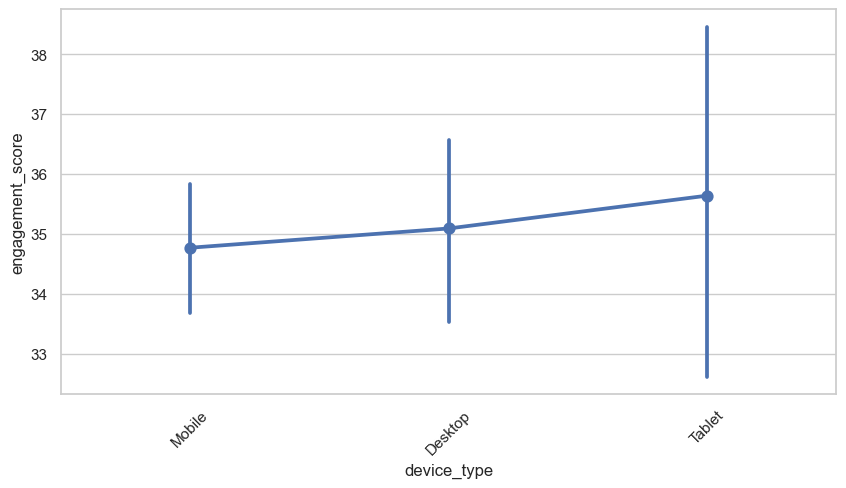

In [19]:

sns.pointplot(data=df, x="device_type", y="engagement_score")
plt.xticks(rotation=45)
plt.show()


### 📊 Catplot – Figure-level Categorical Plot
- High-level interface
- Multiple subplots easily
- Great for dashboards

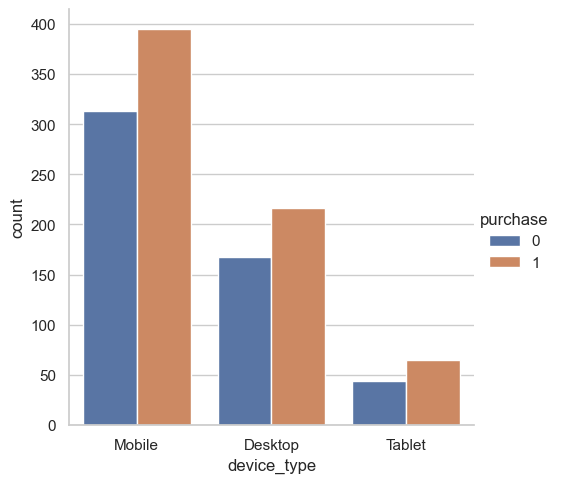

In [20]:

sns.catplot(data=df, x="device_type", hue="purchase", kind="count")
plt.show()


### 📈 ECDF – Cumulative Distribution
- Shows probability distribution
- Used in statistics
- Better than histogram sometimes

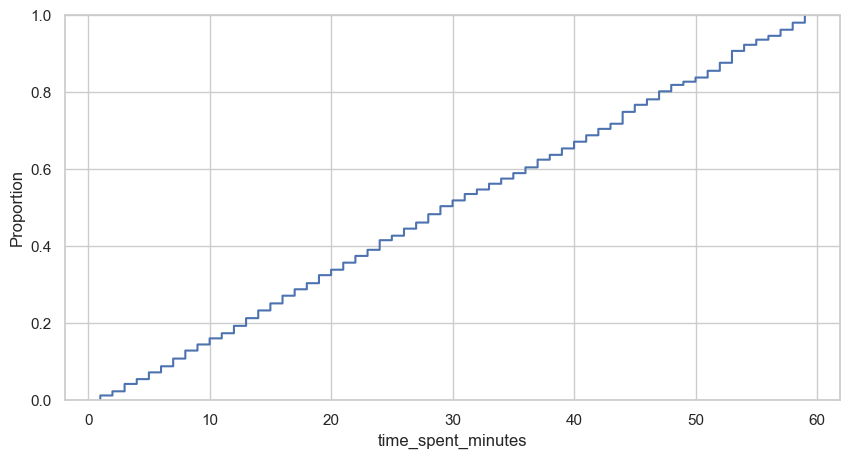

In [21]:

sns.ecdfplot(data=df, x="time_spent_minutes")
plt.show()


### 📈 Regression Plot – Trend & Relationship
- Adds regression line
- Shows relationship strength
- Useful for prediction intuition

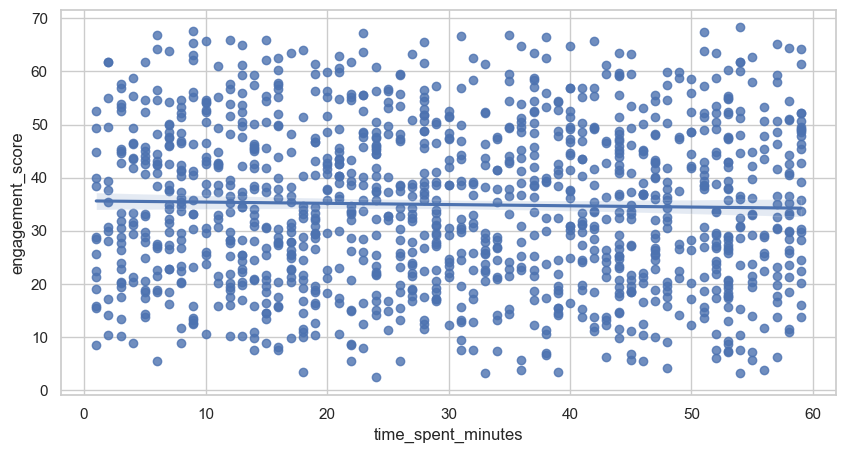

In [22]:

sns.regplot(data=df, x="time_spent_minutes", y="engagement_score")
plt.show()


### 📉 Displot – Figure-level Distribution
- Histogram + KDE
- Flexible & powerful
- Used in EDA

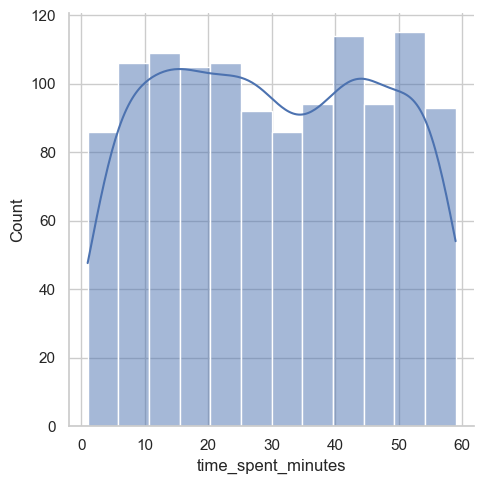

In [23]:

sns.displot(df["time_spent_minutes"], kde=True)
plt.show()
